## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Preprocess

Raw Data Shape: (1050, 8)

First few rows:
   gender race_ethnicity parental_level_of_education         lunch  \
0  female            NaN                         NaN      standard   
1     NaN        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4     NaN            NaN                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                     NaN        72.0           72.0            NaN  
1                     NaN        69.0            NaN           88.0  
2                     NaN        90.0           95.0           93.0  
3                    none        47.0            NaN           44.0  
4                    none        76.0            NaN            NaN  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 8 columns)

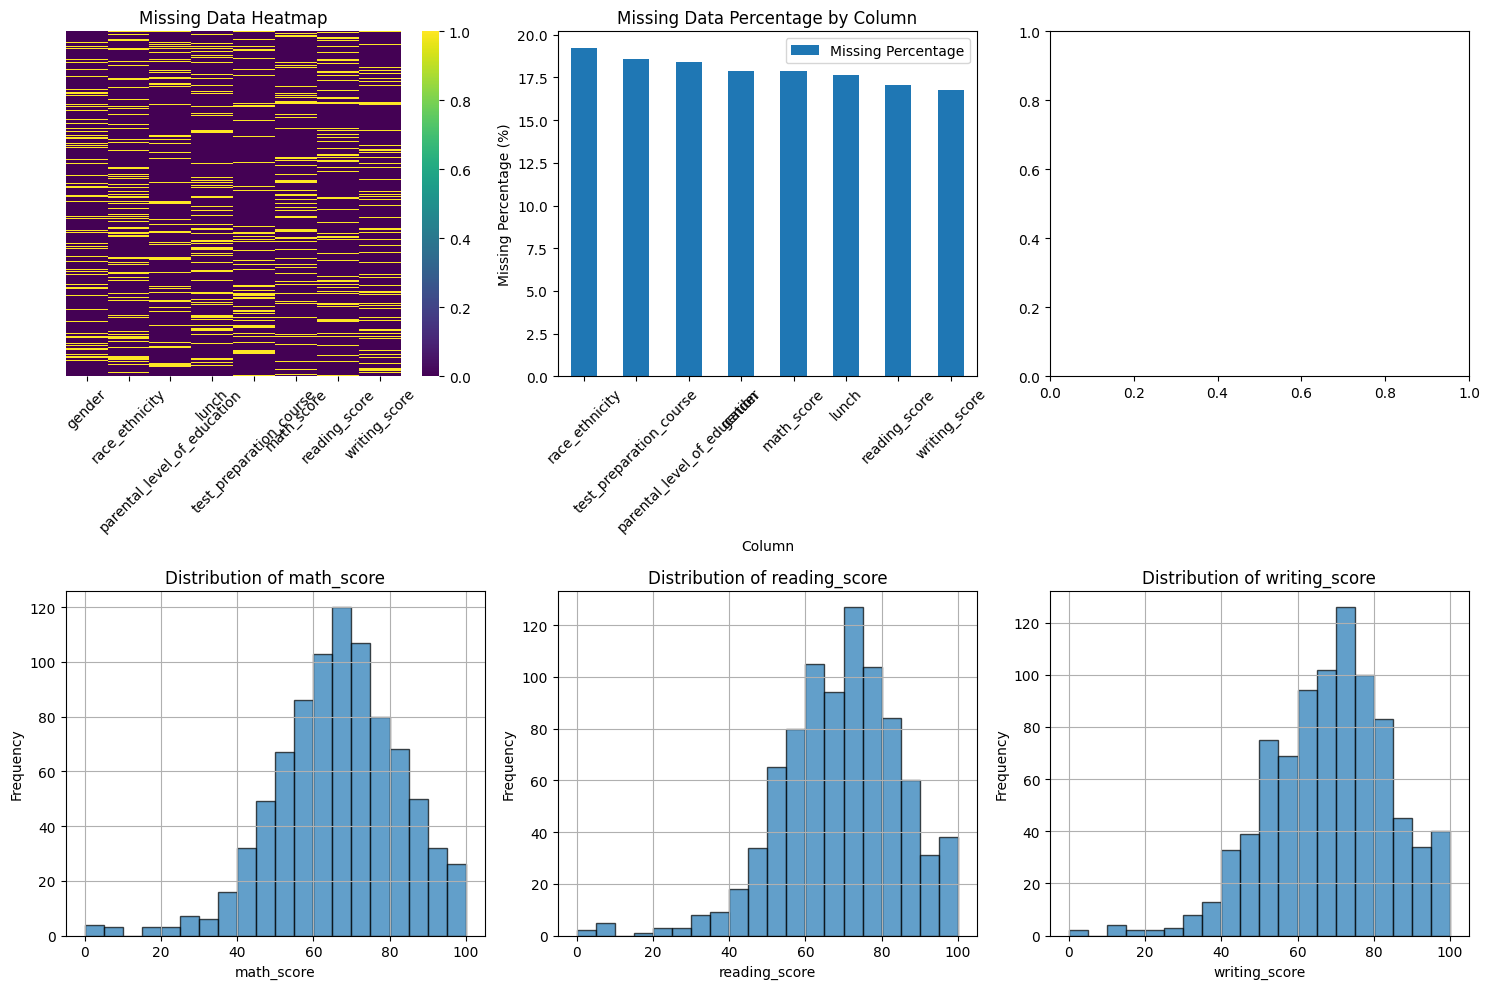

Starting data preprocessing...
Initial data shape: (1050, 8)
Removed 48 duplicate rows

Missing value analysis for categorical variables:
gender: 183 missing values (18.26%)
race_ethnicity: 191 missing values (19.06%)
parental_level_of_education: 183 missing values (18.26%)
lunch: 176 missing values (17.56%)
test_preparation_course: 192 missing values (19.16%)
Missing values in categorical columns after preprocessing:
gender: 0
race_ethnicity: 0
parental_level_of_education: 0
lunch: 0
test_preparation_course: 0

Missing value analysis for numerical variables:
math_score: 180 missing values (17.96%)
reading_score: 168 missing values (16.77%)
writing_score: 165 missing values (16.47%)
mean imputation completed
median imputation completed
knn imputation completed
iterative imputation completed


/var/folders/x9/g11f20ps45b0l8hqg5022bnr0000gp/T/ipykernel_81400/762369033.py:113: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)


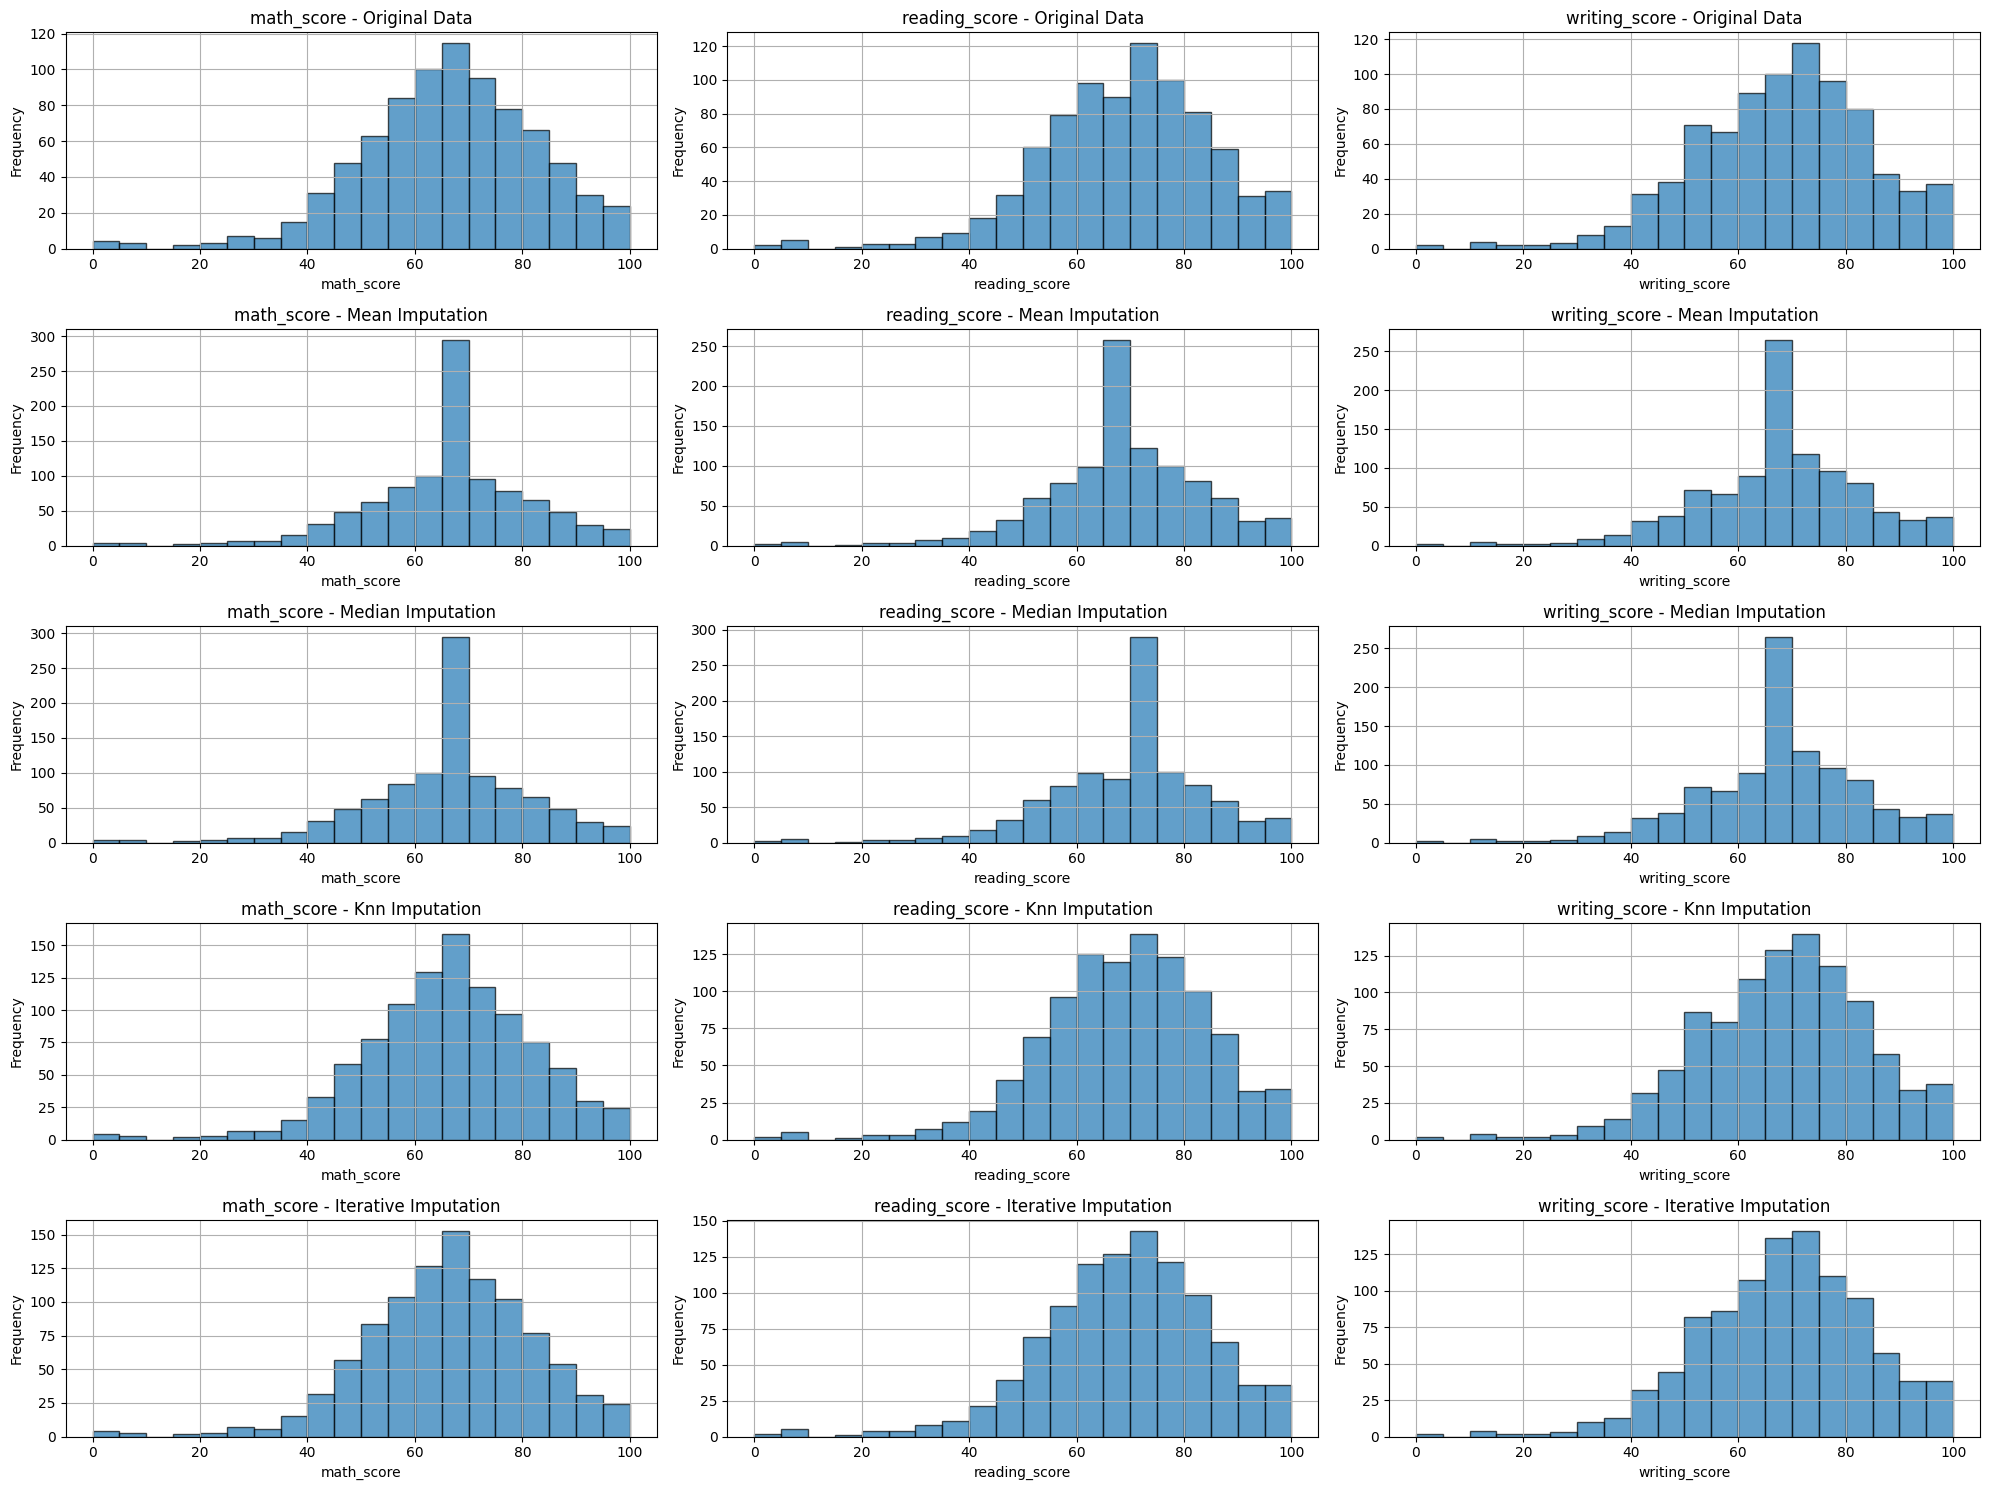


Imputation Strategy Comparison:
--------------------------------------------------

MATH_SCORE:
Original data - Mean: 65.93, Std: 16.35
Mean imputation - Mean: 65.93, Std: 14.80
Median imputation - Mean: 65.95, Std: 14.80
Knn imputation - Mean: 65.91, Std: 15.46
Iterative imputation - Mean: 65.98, Std: 15.43

READING_SCORE:
Original data - Mean: 68.64, Std: 15.81
Mean imputation - Mean: 68.64, Std: 14.42
Median imputation - Mean: 68.87, Std: 14.43
Knn imputation - Mean: 68.65, Std: 15.24
Iterative imputation - Mean: 68.60, Std: 15.37

WRITING_SCORE:
Original data - Mean: 67.67, Std: 16.20
Mean imputation - Mean: 67.67, Std: 14.81
Median imputation - Mean: 67.89, Std: 14.81
Knn imputation - Mean: 67.80, Std: 15.62
Iterative imputation - Mean: 67.89, Std: 15.63

Data shape after handling missing values: (1002, 8)
Missing values after preprocessing:
gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_pre

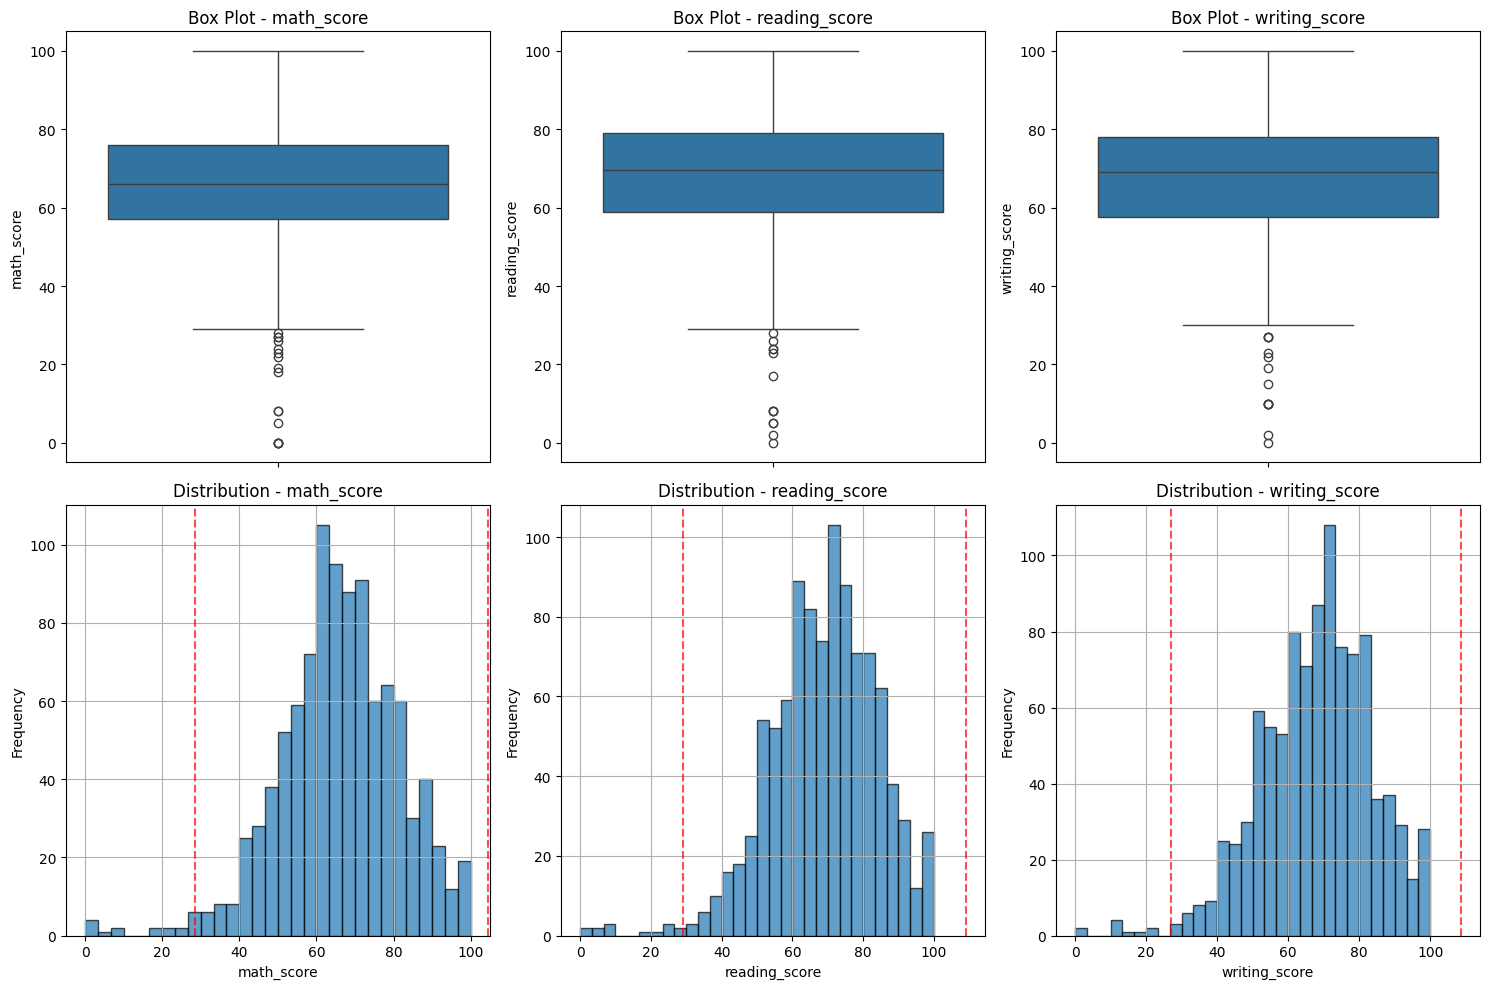


Outlier treatment completed using capping method
Feature engineering completed:
New features added: 7
New columns: ['total_score', 'average_score', 'math_reading_diff', 'math_writing_diff', 'reading_writing_diff', 'math_performance', 'overall_performance']

Categorical columns: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_performance', 'overall_performance']
Numerical columns: ['math_score', 'reading_score', 'writing_score', 'total_score', 'average_score', 'math_reading_diff', 'math_writing_diff', 'reading_writing_diff']
Label encoding completed for categorical variables
Scaling methods applied: StandardScaler, MinMaxScaler, RobustScaler


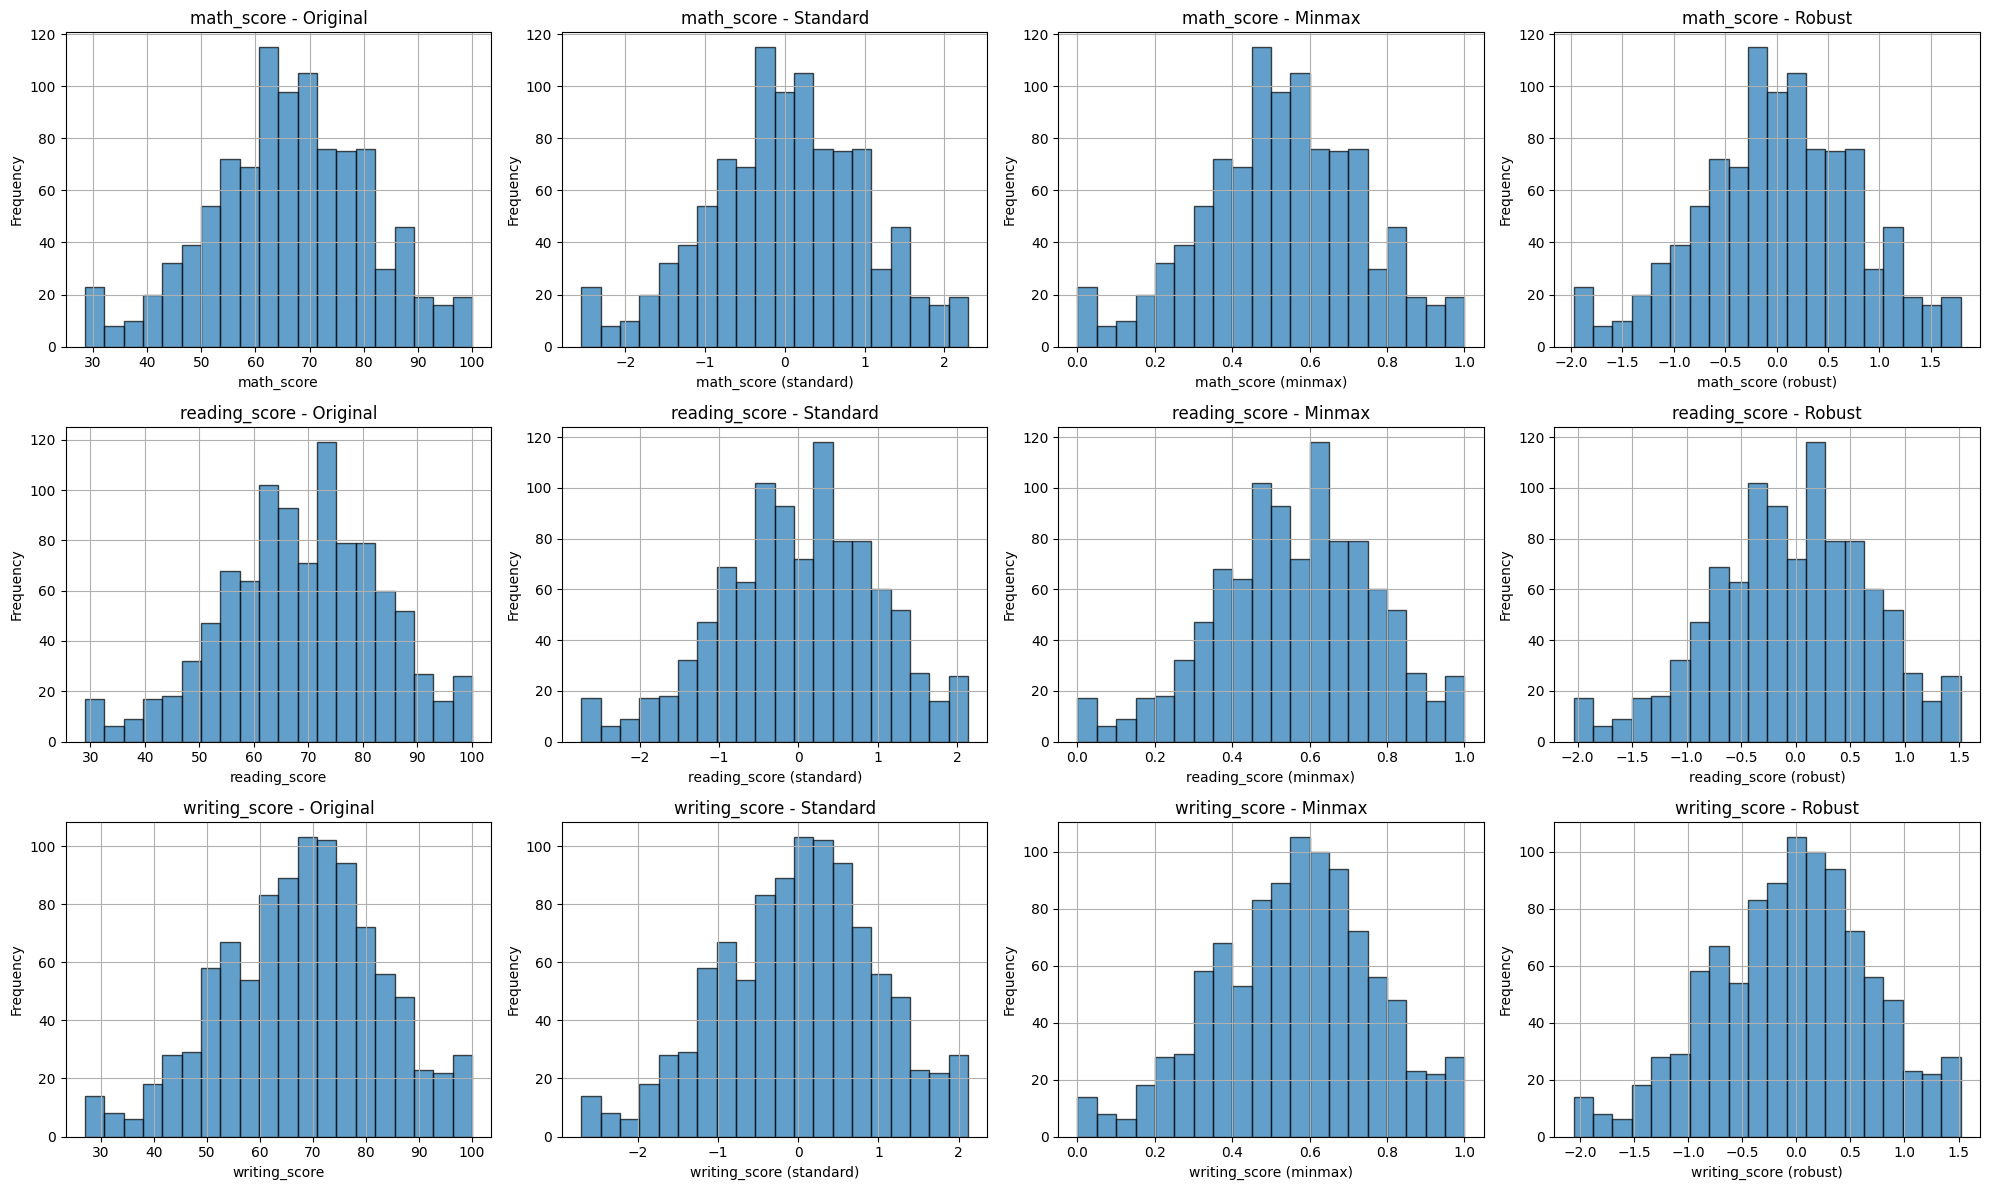


Scaling Methods Comparison:
--------------------------------------------------

MATH_SCORE:
Original - Mean: 66.13, Std: 14.75
Standard - Mean: 0.00, Std: 1.00
Minmax - Mean: 0.53, Std: 0.21
Robust - Mean: 0.01, Std: 0.78

READING_SCORE:
Original - Mean: 68.85, Std: 14.56
Standard - Mean: -0.00, Std: 1.00
Minmax - Mean: 0.56, Std: 0.21
Robust - Mean: -0.04, Std: 0.73

WRITING_SCORE:
Original - Mean: 67.95, Std: 15.13
Standard - Mean: 0.00, Std: 1.00
Minmax - Mean: 0.56, Std: 0.21
Robust - Mean: -0.05, Std: 0.74

Final preprocessed data shape: (1002, 15)
Selected scaling method: standard

Datasets prepared for analysis:
all_features: (1002, 15)
numerical_only: (1002, 8)
categorical_only: (1002, 7)
original_features: (1002, 8)

DATA PREPROCESSING SUMMARY
Original data shape: (1050, 8)
Final data shape: (1002, 15)
Rows removed/modified: 48
Features added: 7

Missing values handled:
- Categorical: Mode imputation
- Numerical: knn imputation

Outliers treated using IQR capping method
Encod

In [2]:
# Data preprocessing libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Unsupervised learning libraries
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Loading and Initial Exploration

### Load the data
df_raw = pd.read_csv('data_with_faults.csv')
print("Raw Data Shape:", df_raw.shape)
print("\nFirst few rows:")
print(df_raw.head())

### Basic data information
print("\nData Info:")
print(df_raw.info())

print("\nData Description:")
print(df_raw.describe())

### Check for missing values
print("\nMissing Values Count:")
missing_counts = df_raw.isnull().sum()
missing_percentage = (df_raw.isnull().sum() / len(df_raw)) * 100
missing_df = pd.DataFrame({
    'Column': missing_counts.index,
    'Missing Count': missing_counts.values,
    'Missing Percentage': missing_percentage.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Percentage', ascending=False)
print(missing_df)

### Visualize missing data pattern
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.heatmap(df_raw.isnull(), cbar=True, xticklabels=True, yticklabels=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
missing_df.plot(x='Column', y='Missing Percentage', kind='bar', ax=plt.gca())
plt.title('Missing Data Percentage by Column')
plt.xticks(rotation=45)
plt.ylabel('Missing Percentage (%)')

### Check unique values in categorical columns
categorical_cols = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
numerical_cols = ['math_score', 'reading_score', 'writing_score']

print("\nUnique values in categorical columns:")
for col in categorical_cols:
    unique_vals = df_raw[col].dropna().unique()
    print(f"{col}: {unique_vals}")

### Check for duplicates
print(f"\nDuplicate rows: {df_raw.duplicated().sum()}")

plt.subplot(2, 3, 3)
# Distribution of numerical columns before preprocessing
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, 4 + i)
    df_raw[col].dropna().hist(bins=20, alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## 2. Data Cleaning and Preprocessing

### Create a copy for preprocessing
df_processed = df_raw.copy()

print("Starting data preprocessing...")
print(f"Initial data shape: {df_processed.shape}")

### 2.1 Handle Duplicates
if df_processed.duplicated().sum() > 0:
    df_processed = df_processed.drop_duplicates()
    print(f"Removed {df_raw.shape[0] - df_processed.shape[0]} duplicate rows")

### 2.2 Handle Missing Values in Categorical Columns

# Check missing patterns
print("\nMissing value analysis for categorical variables:")
for col in categorical_cols:
    missing_count = df_processed[col].isnull().sum()
    if missing_count > 0:
        print(f"{col}: {missing_count} missing values ({missing_count/len(df_processed)*100:.2f}%)")

# Strategy for categorical missing values
def handle_categorical_missing(df, column, strategy='mode'):
    """Handle missing values in categorical columns"""
    if strategy == 'mode':
        # Fill with most frequent value
        mode_value = df[column].mode()[0] if len(df[column].mode()) > 0 else 'unknown'
        df[column].fillna(mode_value, inplace=True)
    elif strategy == 'new_category':
        # Create a new category for missing values
        df[column].fillna('missing', inplace=True)
    elif strategy == 'forward_fill':
        # Forward fill
        df[column].fillna(method='ffill', inplace=True)
        df[column].fillna(df[column].mode()[0], inplace=True)  # Fill remaining with mode
    return df

# Apply different strategies for different columns
df_processed = handle_categorical_missing(df_processed, 'gender', 'mode')
df_processed = handle_categorical_missing(df_processed, 'race_ethnicity', 'mode')
df_processed = handle_categorical_missing(df_processed, 'parental_level_of_education', 'mode')
df_processed = handle_categorical_missing(df_processed, 'lunch', 'mode')
df_processed = handle_categorical_missing(df_processed, 'test_preparation_course', 'mode')

print("Missing values in categorical columns after preprocessing:")
for col in categorical_cols:
    print(f"{col}: {df_processed[col].isnull().sum()}")

### 2.3 Handle Missing Values in Numerical Columns

print("\nMissing value analysis for numerical variables:")
for col in numerical_cols:
    missing_count = df_processed[col].isnull().sum()
    if missing_count > 0:
        print(f"{col}: {missing_count} missing values ({missing_count/len(df_processed)*100:.2f}%)")

### Try multiple imputation strategies for numerical data
imputation_strategies = {
    'mean': SimpleImputer(strategy='mean'),
    'median': SimpleImputer(strategy='median'),
    'knn': KNNImputer(n_neighbors=5),
    'iterative': IterativeImputer(random_state=42, max_iter=10)
}

# Create datasets with different imputation strategies
imputed_datasets = {}
numerical_data = df_processed[numerical_cols].copy()

for strategy_name, imputer in imputation_strategies.items():
    try:
        imputed_data = imputer.fit_transform(numerical_data)
        imputed_df = pd.DataFrame(imputed_data, columns=numerical_cols, index=numerical_data.index)
        imputed_datasets[strategy_name] = imputed_df
        print(f"{strategy_name} imputation completed")
    except Exception as e:
        print(f"{strategy_name} imputation failed: {e}")

### Compare imputation strategies
plt.figure(figsize=(20, 15))

# Calculate the number of rows needed
n_methods = len(imputed_datasets)
n_cols = len(numerical_cols)
n_rows = n_methods + 1  # +1 for original data

plot_index = 1

for i, col in enumerate(numerical_cols):
    # Plot original data
    plt.subplot(n_rows, n_cols, plot_index)
    df_processed[col].dropna().hist(bins=20, alpha=0.7, label='Original', edgecolor='black')
    plt.title(f'{col} - Original Data')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plot_index += 1

# Plot imputation methods for each column
for method, data in imputed_datasets.items():
    for i, col in enumerate(numerical_cols):
        plt.subplot(n_rows, n_cols, plot_index)
        data[col].hist(bins=20, alpha=0.7, edgecolor='black')
        plt.title(f'{col} - {method.title()} Imputation')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plot_index += 1

plt.tight_layout()
plt.show()

# Also create a comparison summary
print("\nImputation Strategy Comparison:")
print("-" * 50)

for col in numerical_cols:
    print(f"\n{col.upper()}:")
    print(f"Original data - Mean: {df_processed[col].mean():.2f}, Std: {df_processed[col].std():.2f}")
    
    for method, data in imputed_datasets.items():
        mean_val = data[col].mean()
        std_val = data[col].std()
        print(f"{method.title()} imputation - Mean: {mean_val:.2f}, Std: {std_val:.2f}")

### Choose best imputation strategy (KNN for this example)
best_strategy = 'knn'  # You can change this based on your analysis
df_numerical_imputed = imputed_datasets[best_strategy]

# Combine categorical and numerical data
df_processed = df_processed[categorical_cols].copy()
for col in numerical_cols:
    df_processed[col] = df_numerical_imputed[col]

print(f"\nData shape after handling missing values: {df_processed.shape}")
print("Missing values after preprocessing:")
print(df_processed.isnull().sum())

### 2.4 Outlier Detection and Treatment

def detect_outliers_iqr(df, columns):
    """Detect outliers using IQR method"""
    outliers_dict = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outliers_dict[col] = {
            'outlier_indices': outliers,
            'count': len(outliers),
            'percentage': len(outliers) / len(df) * 100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }
    return outliers_dict

# Detect outliers in numerical columns
outliers_info = detect_outliers_iqr(df_processed, numerical_cols)

print("\nOutlier Analysis (IQR Method):")
for col, info in outliers_info.items():
    print(f"{col}: {info['count']} outliers ({info['percentage']:.2f}%)")
    print(f"  Range: [{info['lower_bound']:.2f}, {info['upper_bound']:.2f}]")

### Visualize outliers
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    # Box plot
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df_processed[col])
    plt.title(f'Box Plot - {col}')
    
    # Histogram with outliers marked
    plt.subplot(2, 3, i + 4)
    df_processed[col].hist(bins=30, alpha=0.7, edgecolor='black')
    outlier_indices = outliers_info[col]['outlier_indices']
    if len(outlier_indices) > 0:
        outlier_values = df_processed.loc[outlier_indices, col]
        plt.axvline(outliers_info[col]['lower_bound'], color='red', linestyle='--', alpha=0.7, label='Outlier Bounds')
        plt.axvline(outliers_info[col]['upper_bound'], color='red', linestyle='--', alpha=0.7)
    plt.title(f'Distribution - {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Handle outliers (using capping method)
def cap_outliers(df, columns, method='iqr', factor=1.5):
    """Cap outliers using IQR method"""
    df_capped = df.copy()
    for col in columns:
        if method == 'iqr':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - factor * IQR
            upper_bound = Q3 + factor * IQR
        elif method == 'percentile':
            lower_bound = df[col].quantile(0.05)
            upper_bound = df[col].quantile(0.95)
        
        df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)
    return df_capped

# Apply outlier capping
df_processed_capped = cap_outliers(df_processed, numerical_cols)

print("\nOutlier treatment completed using capping method")

### 2.5 Feature Engineering

# Create additional features
df_processed_capped['total_score'] = (df_processed_capped['math_score'] + 
                                      df_processed_capped['reading_score'] + 
                                      df_processed_capped['writing_score'])

df_processed_capped['average_score'] = df_processed_capped['total_score'] / 3

# Create score difference features
df_processed_capped['math_reading_diff'] = df_processed_capped['math_score'] - df_processed_capped['reading_score']
df_processed_capped['math_writing_diff'] = df_processed_capped['math_score'] - df_processed_capped['writing_score']
df_processed_capped['reading_writing_diff'] = df_processed_capped['reading_score'] - df_processed_capped['writing_score']

# Create categorical features based on scores
df_processed_capped['math_performance'] = pd.cut(df_processed_capped['math_score'], 
                                                bins=[0, 50, 70, 85, 100], 
                                                labels=['Poor', 'Average', 'Good', 'Excellent'])

df_processed_capped['overall_performance'] = pd.cut(df_processed_capped['average_score'], 
                                                   bins=[0, 50, 70, 85, 100], 
                                                   labels=['Poor', 'Average', 'Good', 'Excellent'])

print("Feature engineering completed:")
print(f"New features added: {df_processed_capped.shape[1] - df_processed.shape[1]}")
print("New columns:", list(df_processed_capped.columns[df_processed.shape[1]:]))

### 2.6 Encoding Categorical Variables

# Separate categorical and numerical columns for the processed data
categorical_cols_extended = categorical_cols + ['math_performance', 'overall_performance']
numerical_cols_extended = numerical_cols + ['total_score', 'average_score', 'math_reading_diff', 
                                           'math_writing_diff', 'reading_writing_diff']

print(f"\nCategorical columns: {categorical_cols_extended}")
print(f"Numerical columns: {numerical_cols_extended}")

# Label encoding for categorical variables
label_encoders = {}
df_encoded = df_processed_capped.copy()

for col in categorical_cols_extended:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

print("Label encoding completed for categorical variables")

### 2.7 Feature Scaling

# Prepare different scaling methods
scaling_methods = {
    'standard': StandardScaler(),
    'minmax': MinMaxScaler(),
    'robust': RobustScaler()
}

scaled_datasets = {}

for method_name, scaler in scaling_methods.items():
    scaled_data = scaler.fit_transform(df_encoded[numerical_cols_extended])
    scaled_df = df_encoded.copy()
    scaled_df[numerical_cols_extended] = scaled_data
    scaled_datasets[method_name] = {
        'data': scaled_df,
        'scaler': scaler
    }

print("Scaling methods applied: StandardScaler, MinMaxScaler, RobustScaler")

n_scaling_methods = len(scaling_methods)
n_numerical_cols = len(numerical_cols)

plt.figure(figsize=(20, 12))

plot_index = 1

for i, col in enumerate(numerical_cols):
    # Original data
    plt.subplot(n_numerical_cols, n_scaling_methods + 1, plot_index)
    df_encoded[col].hist(bins=20, alpha=0.7, edgecolor='black')
    plt.title(f'{col} - Original')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plot_index += 1
    
    # Scaled versions
    for j, (method, dataset) in enumerate(scaled_datasets.items()):
        plt.subplot(n_numerical_cols, n_scaling_methods + 1, plot_index)
        dataset['data'][col].hist(bins=20, alpha=0.7, edgecolor='black')
        plt.title(f'{col} - {method.title()}')
        plt.xlabel(f'{col} ({method})')
        plt.ylabel('Frequency')
        plot_index += 1

plt.tight_layout()
plt.show()

# Print scaling statistics
print("\nScaling Methods Comparison:")
print("-" * 50)

for col in numerical_cols:
    print(f"\n{col.upper()}:")
    print(f"Original - Mean: {df_encoded[col].mean():.2f}, Std: {df_encoded[col].std():.2f}")
    
    for method, dataset in scaled_datasets.items():
        mean_val = dataset['data'][col].mean()
        std_val = dataset['data'][col].std()
        print(f"{method.title()} - Mean: {mean_val:.2f}, Std: {std_val:.2f}")

### 2.8 Final Data Preparation for Unsupervised Learning

# Choose the best scaled dataset (StandardScaler for this example)
best_scaling = 'standard'
df_final = scaled_datasets[best_scaling]['data'].copy()
final_scaler = scaled_datasets[best_scaling]['scaler']

print(f"\nFinal preprocessed data shape: {df_final.shape}")
print(f"Selected scaling method: {best_scaling}")

# Create different datasets for different unsupervised learning tasks
datasets_for_analysis = {
    'all_features': df_final,
    'numerical_only': df_final[numerical_cols_extended],
    'categorical_only': df_final[categorical_cols_extended],
    'original_features': df_final[categorical_cols + numerical_cols]
}

print("\nDatasets prepared for analysis:")
for name, data in datasets_for_analysis.items():
    print(f"{name}: {data.shape}")

### Data Quality Report
print("\n" + "="*60)
print("DATA PREPROCESSING SUMMARY")
print("="*60)

print(f"Original data shape: {df_raw.shape}")
print(f"Final data shape: {df_final.shape}")
print(f"Rows removed/modified: {df_raw.shape[0] - df_final.shape[0]}")
print(f"Features added: {df_final.shape[1] - df_raw.shape[1]}")

print(f"\nMissing values handled:")
print(f"- Categorical: Mode imputation")
print(f"- Numerical: {best_strategy} imputation")

print(f"\nOutliers treated using IQR capping method")
print(f"Encoding: Label encoding for categorical variables")
print(f"Scaling: {best_scaling} scaling for numerical variables")

print(f"\nFinal data quality check:")
print(f"- Missing values: {df_final.isnull().sum().sum()}")
print(f"- Duplicates: {df_final.duplicated().sum()}")
print(f"- Data types consistent: {len(df_final.select_dtypes(include=[np.number]).columns) == df_final.shape[1]}")

## 3. Unsupervised Learning (Using Preprocessed Data)

### Use the best preprocessed dataset for unsupervised learning
df = datasets_for_analysis['all_features']
print(f"Using dataset for unsupervised learning: {df.shape}")


In [4]:
X = df.drop(columns=['math_score'],axis=1)
y = df['math_score']

In [6]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((801, 14), (201, 14))

#### Create an Evaluate Function to give all metrics after model Training

In [8]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [9]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=0.1),
    "Ridge": Ridge(alpha=1.0),
    "K-Neighbors Regressor": KNeighborsRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.1535
- Mean Absolute Error: 0.1166
- R2 Score: 0.9760
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1563
- Mean Absolute Error: 0.1235
- R2 Score: 0.9771


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0006
- Mean Absolute Error: 0.0005
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0006
- Mean Absolute Error: 0.0005
- R2 Score: 1.0000


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.2083
- Mean Absolute Error: 0.1436
- R2 Score: 0.9558
-----------------------

### Results

In [10]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,1.000000
2,Ridge,1.000000
1,Lasso,0.977077
3,K-Neighbors Regressor,0.955005


## Linear Regression

In [25]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.03


## Plot y_pred and y_test

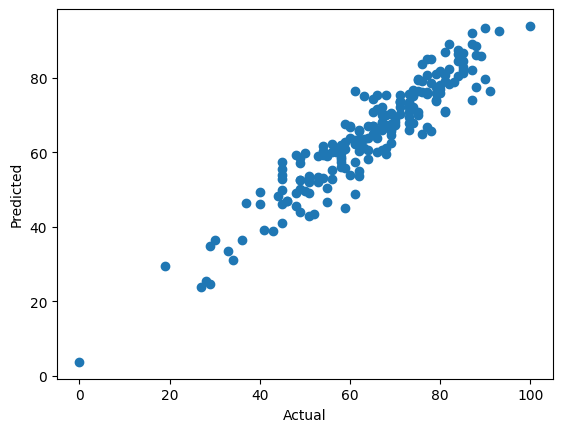

In [26]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

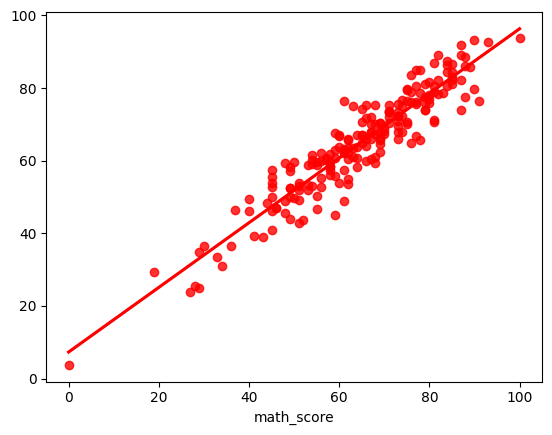

In [27]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [28]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
